# Regression

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create Data Frames

### DF Linear Regression

In [44]:
df = pd.DataFrame({'gender': np.random.binomial(1, 0.55, 1000),
                   'height': np.random.normal(0, 10, 1000),
                   'noise': np.random.normal(0, 8, 1000)})
df.head(10)

,gender,height,noise
0,0,0.205289,10.455714
1,1,0.239875,-9.410054
2,0,-11.360594,-1.775401
3,0,-4.819449,-0.699379
4,1,-5.579769,-4.352356
5,0,2.325134,-5.893855
6,1,-8.151383,-3.894806
7,0,-1.500719,-4.258646
8,1,-3.661698,-3.752619
9,0,0.758295,11.473623


In [45]:
df['height'] = df['height'] + df['gender'].apply(lambda x: 160 if x else 180)
df['weight'] = df['height'] + df['noise'] -110
df.drop('noise', axis=1, inplace=True)

In [46]:
df['height_with75nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.25) else np.nan)
df['height_with10nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.9) else np.nan)

In [47]:
df

,gender,height,weight,height_with75nan,height_with10nan
0,0,180.205289,80.661003,NaN,180.205289
1,1,160.239875,40.829821,160.239875,160.239875
2,0,168.639406,56.864005,NaN,NaN
3,0,175.180551,64.481172,NaN,175.180551
4,1,154.420231,40.067876,NaN,154.420231
...,...,...,...,...,...
995,1,181.714900,87.015849,181.714900,181.714900
996,1,163.975613,57.054369,NaN,NaN
997,0,177.677148,57.468690,NaN,177.677148
998,1,171.987064,55.059431,NaN,171.987064


In [48]:
df.isna().mean()

gender              0.000
height              0.000
weight              0.000
height_with75nan    0.733
height_with10nan    0.107
dtype: float64

In [49]:
df['height'].describe(percentiles=[.9, .95, .99])

count    1000.000000
mean      169.471071
std        14.000454
min       130.662655
50%       168.965865
90%       188.715671
95%       192.905451
99%       201.168634
max       213.454747
Name: height, dtype: float64

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_2300\971491414.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


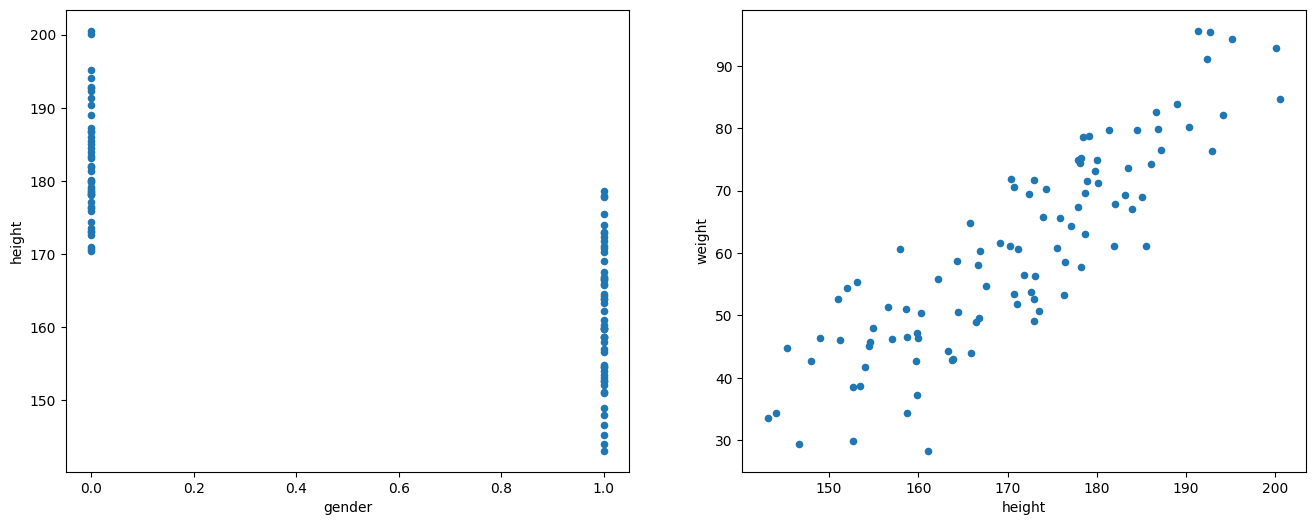

In [50]:
df_plot = df.sample(100)
fig, ax = plt.subplots(1,2, figsize=(16, 6))
df_plot.plot(kind='scatter', x='gender', y='height', ax=ax[0])
df_plot.plot(kind='scatter', x='height', y='weight', ax=ax[1])
fig.show()

### DF Anscombe

In [95]:
df_anscombe = pd.DataFrame(
    [[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
     [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]]
).T

df_anscombe.columns = ['x', 'y1', 'y2', 'y3']
df_anscombe

,x,y1,y2,y3
0,10.0,8.04,9.14,7.46
1,8.0,6.95,8.14,6.77
2,13.0,7.58,8.74,12.74
3,9.0,8.81,8.77,7.11
4,11.0,8.33,9.26,7.81
5,14.0,9.96,8.10,8.84
6,6.0,7.24,6.13,6.08
7,4.0,4.26,3.10,5.39
8,12.0,10.84,9.13,8.15
9,7.0,4.82,7.26,6.42


C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_11208\229155848.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


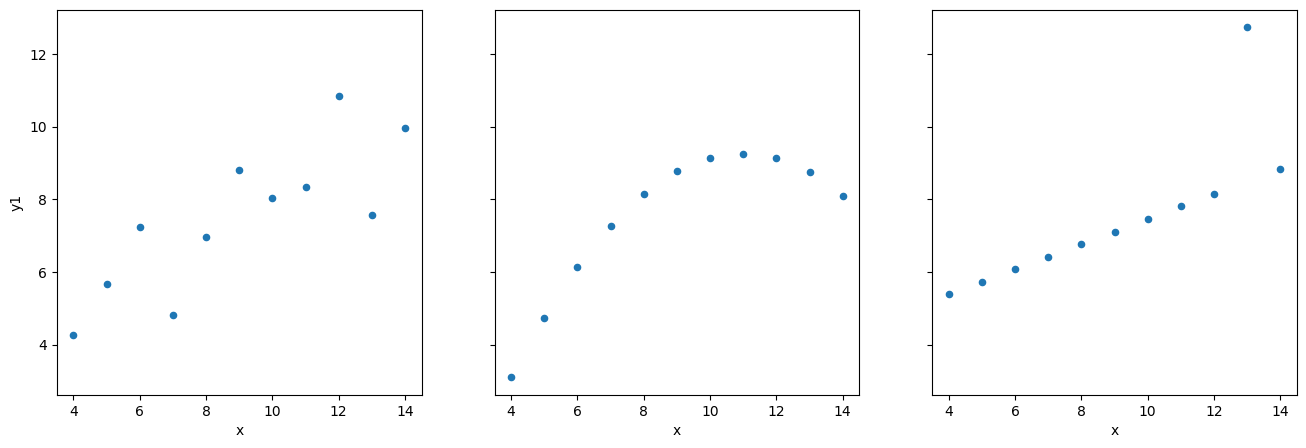

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i in range(3):

    df_anscombe.plot(
        kind='scatter', x='x', y=f'y{i+1}', ax=axs[i]
    )
    
fig.show()

### DF Polynomial

In [8]:
np.random.seed(42)
x = np.arange(0, 1000) / 100 -5
y = (2 + 0.5 * x + 0.1 * x**2 + x**3) + np.random.normal(0,12,1000)

In [9]:
df_poly = pd.DataFrame({'x':x, 'y':y})

<Axes: xlabel='x', ylabel='y'>

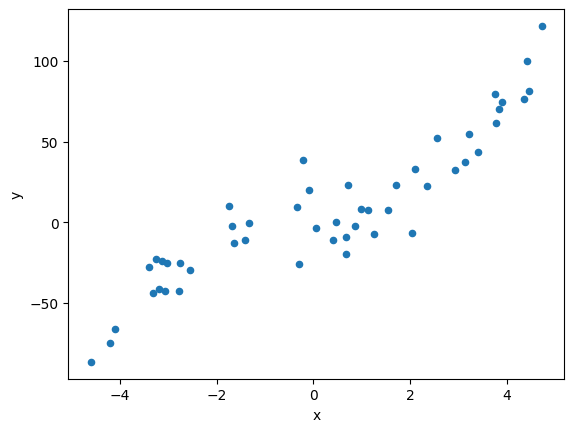

In [10]:
df_poly.sample(50).plot(kind='scatter', x='x', y='y')

### DF Boston

Boston house prices dataset

Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
...

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [3]:
df_boston = pd.read_csv('./data/boston.csv', index_col=False)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Regressions

### Linear Regression with df (linear regression)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


In [52]:
reg = LinearRegression()
# reg.fit(x,y): x is a matrix since we can use more thand one feature
#reg.fit(df['height'].values.reshape(-1, 1), df['weight'])
reg.fit(df[['height']], df['weight'])

LinearRegression()

In [53]:
print('Weight = {:.2f} + Height * {:.2f}'.format(reg.intercept_, reg.coef_[0]))


Weight = -110.31 + Height * 1.00


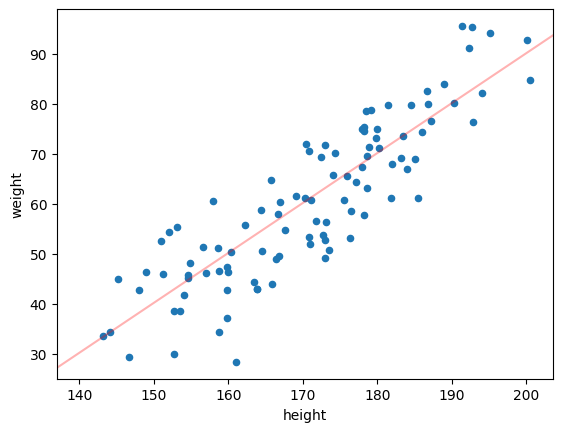

In [54]:
df_plot.plot(kind='scatter', x='height', y='weight')
# Two possibilities how to draw the regression line: first old version, second from matplot version 3.3
# plt.plot([140, 200], [-109.82+140*1, -109.82+200*1], color='red', alpha=0.3)
plt.axline([140, -109.82+140*1], [200, -109.82+200*1], color='red', alpha=0.3)

In [61]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(fit_intercept=True, solver='svd', alpha=10)
reg_ridge.fit(df[['height']], df['weight'])

reg_lasso = Lasso(fit_intercept=True)
reg_lasso.fit(df[['height']], df['weight'])

Lasso()

In [62]:
print('Weight = {:.2f} + Height * {:.2f}'.format(reg.intercept_, reg.coef_[0]))
print('Weight = {:.2f} + Height * {:.2f}'.format(reg_ridge.intercept_, reg_ridge.coef_[0]))
print('Weight = {:.2f} + Height * {:.2f}'.format(reg_lasso.intercept_, reg_lasso.coef_[0]))

Weight = -110.31 + Height * 1.00
Weight = -110.30 + Height * 1.00
Weight = -109.45 + Height * 0.99


In [69]:
ridge_weight_low = -110.30 + 140 * 1
ridge_weight_high = -110.30 + 200 * 1
lasso_weight_low = -109.45 + 140 * 0.99
lasso_weight_high = -109.45 + 200 * 0.99
print(ridge_weight_low, lasso_weight_low, ridge_weight_high, lasso_weight_high)

29.700000000000003 29.14999999999999 89.7 88.55


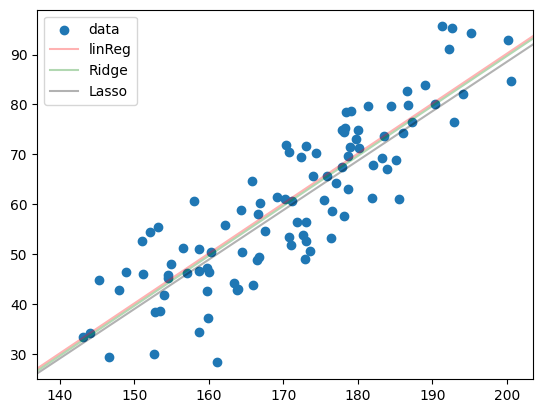

In [70]:
plt.scatter(df_plot['height'], df_plot['weight'], label='data')
plt.axline([140, -109.82+140*1], [200, -109.82+200*1], color='red', alpha=0.3, label='linReg')
plt.axline([140, ridge_weight_low], [200, ridge_weight_high], color='green', alpha=0.3, label='Ridge')
plt.axline([140, lasso_weight_low], [200, lasso_weight_high], color='black', alpha=0.3, label='Lasso')
plt.legend()
plt.show()

In [72]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(max_depth=3)
reg_tree.fit(df[['height']], df['weight'])
df['weight_hat_tree'] = reg_tree.predict(df[['height']])


In [73]:
df.head()

,gender,height,weight,height_with75nan,height_with10nan,weight_hat_tree
0,0,180.205289,80.661003,NaN,180.205289,70.742330
1,1,160.239875,40.829821,160.239875,160.239875,48.170712
2,0,168.639406,56.864005,NaN,NaN,55.797377
3,0,175.180551,64.481172,NaN,175.180551,63.132832
4,1,154.420231,40.067876,NaN,154.420231,41.493371


In [76]:
df_plot = df.sample(100)[['height', 'weight', 'weight_hat_tree']].sort_values('height')
df_plot.head()

,height,weight,weight_hat_tree
161,143.410310,37.568576,34.041438
961,144.443671,31.355156,34.041438
900,146.594805,24.230039,34.041438
608,147.705392,36.458875,34.041438
673,148.902006,46.150747,41.493371


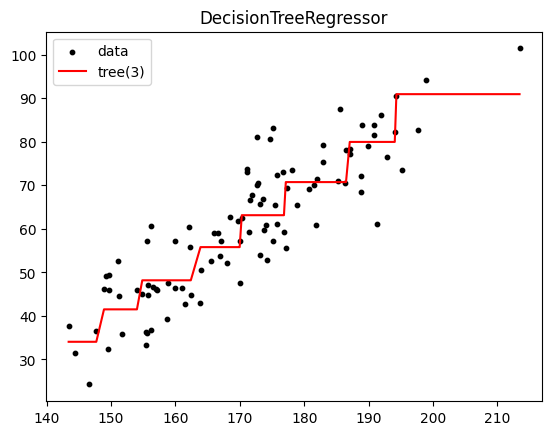

In [82]:
plt.scatter(df_plot['height'], df_plot['weight'], label='data', color='black', s=10)
plt.plot(df_plot['height'], df_plot['weight_hat_tree'], label='tree(3)', color='red')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

In [173]:
from sklearn.svm import LinearSVR
reg_svm = LinearSVR(random_state=42, epsilon=0, max_iter=100000, C=50)
reg_svm.fit(df[['height']], df['weight'])
df['weight_hat_svm'] = reg_svm.predict(df[['height']])

c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [174]:
df_plot = df.sample(100)[['height', 'weight', 'weight_hat_svm']].sort_values('height')
df_plot.head()

,height,weight,weight_hat_svm
900,146.594805,24.230039,38.930908
874,146.948860,41.777297,39.282032
828,147.670371,35.921819,39.997570
287,148.040700,38.341262,40.364833
863,149.051455,34.682207,41.367220


In [175]:
print(reg_svm.intercept_, reg_svm.coef_)

[-106.45030369] [0.99172144]


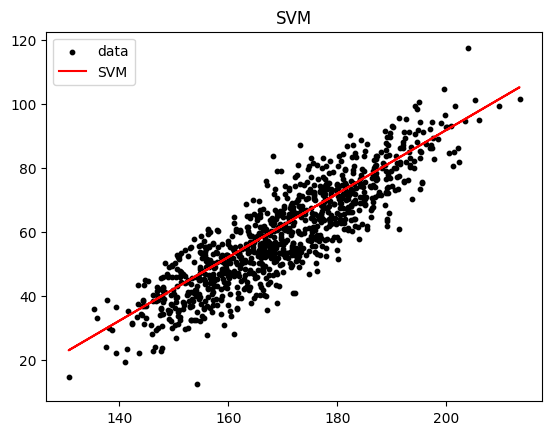

In [176]:
plt.scatter(df['height'], df['weight'], label='data', color='black', s=10)
plt.plot(df['height'], df['weight_hat_svm'], label='SVM', color='red')
plt.legend()
plt.title('SVM')
plt.show()

### Regression Anscombe

R2: 0.67, MSE: 1.25, MAE: 0.84,  MdAE: 0.74   @ target=y1
R2: 0.67, MSE: 1.25, MAE: 0.97,  MdAE: 0.76   @ target=y2
R2: 0.67, MSE: 1.25, MAE: 0.72,  MdAE: 0.39   @ target=y3


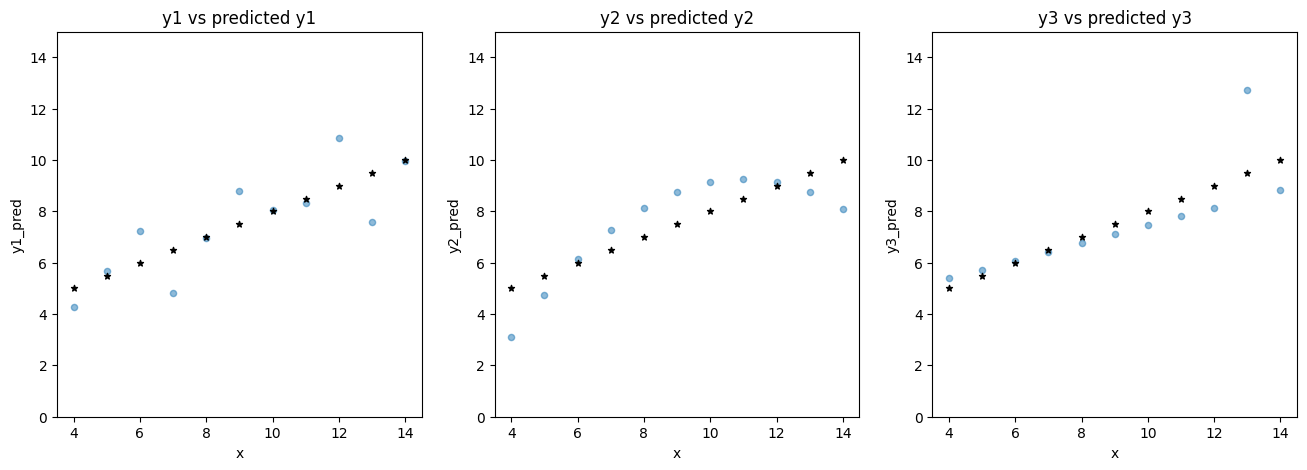

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = LinearRegression()
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        title=f'{target} vs predicted {target}', kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )

    
    print(
        'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f},  MdAE: {:.2f}   @ target={}'.format(
            r2_score(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            median_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

MSE: 1.31, MAE: 1.01 @ target=y1
MSE: 0.72, MAE: 0.68 @ target=y2
MSE: 1.34, MAE: 0.98 @ target=y3


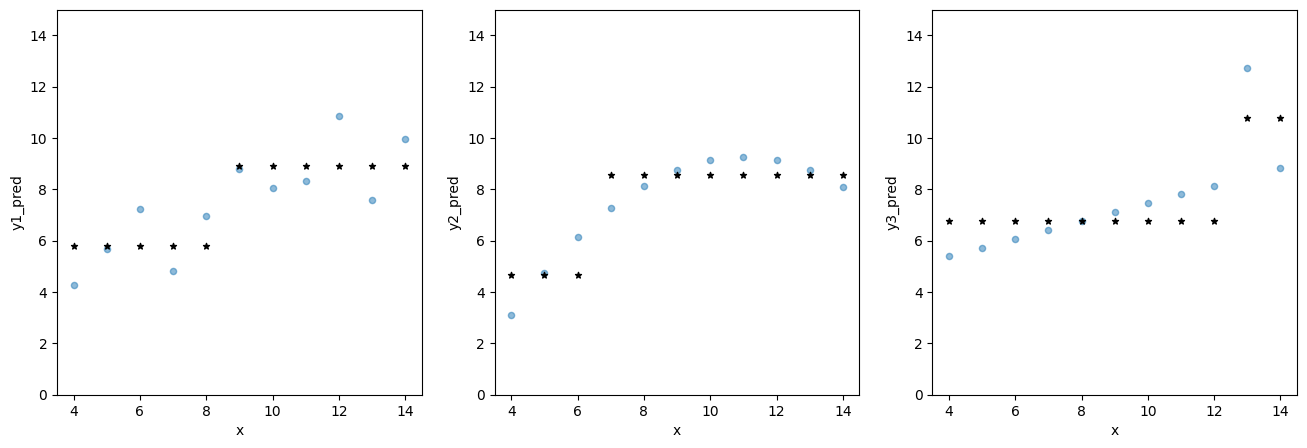

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = DecisionTreeRegressor(max_depth=1)
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )
    
    print(
        'MSE: {:.2f}, MAE: {:.2f} @ target={}'.format(
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

### Polynomial Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [12]:
reg = LinearRegression()
reg.fit(df_poly[['x']], df_poly['y'])

LinearRegression()

In [13]:
print('intercept: ', reg.intercept_, '\nslope: ', reg.coef_[0] )

intercept:  3.016036695565358 
slope:  15.64340513949006


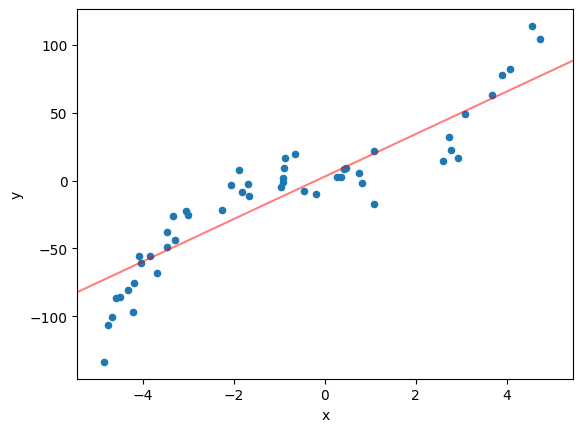

In [14]:
min_poly = df_poly.sample(50)['x'].min()
max_poly = df_poly.sample(50)['x'].max()


df_poly.sample(50).plot(kind='scatter', x='x', y='y')
plt.axline((min_poly, 3.01 + min_poly * 15.64), (max_poly, 3.01 + max_poly * 15.64), color='red', alpha=0.5)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
df_poly_processed = poly.fit_transform(df_poly[['x']])


In [183]:
from sklearn.linear_model import LinearRegression

reg_poly = LinearRegression(fit_intercept=False)
reg_poly.fit(df_poly_processed,  df_poly['y'])

LinearRegression(fit_intercept=False)

In [184]:
reg_poly.coef_

array([2.09419397, 0.39214426, 0.11672252, 1.01682583])

In [187]:
df_poly.head()

,x,y,y_hat
0,-5.00,-117.039430,-122.360000
1,-4.99,-123.915661,-121.617589
2,-4.98,-113.743690,-120.878152
3,-4.97,-102.502025,-120.141683
4,-4.96,-122.853616,-119.408176


In [180]:
df_poly['y_hat'] = 2.09 + 0.39 * df_poly['x'] + 0.1 * df_poly['x']**2 + df_poly['x']**3

In [181]:
df_poly.head()

,x,y,y_hat
0,-5.00,-117.039430,-122.360000
1,-4.99,-123.915661,-121.617589
2,-4.98,-113.743690,-120.878152
3,-4.97,-102.502025,-120.141683
4,-4.96,-122.853616,-119.408176


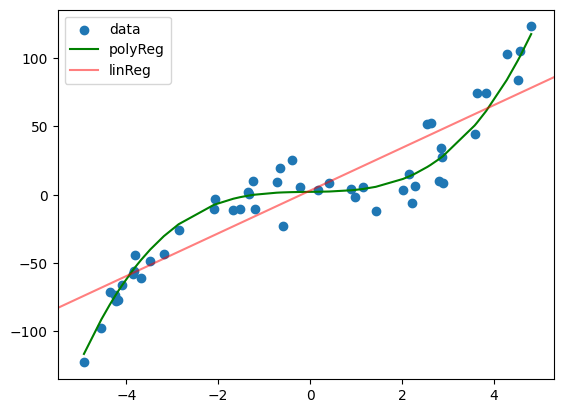

In [191]:
min_poly = df_poly.sample(50)['x'].min()
max_poly = df_poly.sample(50)['x'].max()


df_poly_sample = df_poly.sample(50).sort_values('x',ascending=True)
plt.scatter(df_poly_sample['x'],df_poly_sample['y'], label='data')
plt.plot(df_poly_sample['x'],df_poly_sample['y_hat'], color='green', label='polyReg')
plt.axline((min_poly, 3.01 + min_poly * 15.64), (max_poly, 3.01 + max_poly * 15.64), color='red', alpha=0.5, label='linReg')
plt.legend()
plt.show()

In [220]:
from sklearn.svm import SVR
reg_svm_poly = SVR(kernel='poly', degree=3, C=50, epsilon=.00001)
reg_svm_poly.fit(df_poly_processed,  df_poly['y'])
df_poly['y_hat_svr'] = reg_svm_poly.predict(df_poly_processed)

In [221]:
min_poly = df_poly.sample(50)['x'].min()
max_poly = df_poly.sample(50)['x'].max()


df_poly_sample = df_poly.sample(50).sort_values('x',ascending=True)

df_poly_sample.head()

,x,y,y_hat,y_hat_svr
5,-4.95,-122.121768,-118.677625,-113.402397
19,-4.81,-126.323675,-108.756931,-113.291145
40,-4.60,-86.658401,-94.924000,-104.432801
64,-4.36,-71.410586,-80.591296,-87.633267
93,-4.07,-69.729599,-65.259953,-64.904945


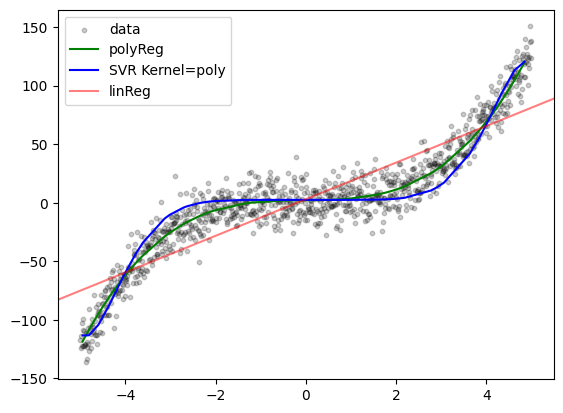

In [222]:
plt.scatter(df_poly['x'],df_poly['y'], label='data', alpha=0.2, color='black', s=10)
plt.plot(df_poly_sample['x'],df_poly_sample['y_hat'], color='green', label='polyReg')
plt.plot(df_poly_sample['x'],df_poly_sample['y_hat_svr'], color='blue', label='SVR Kernel=poly')
plt.axline((min_poly, 3.01 + min_poly * 15.64), (max_poly, 3.01 + max_poly * 15.64), color='red', alpha=0.5, label='linReg')
plt.legend()
plt.show()

## Regression with multiple features and splitting the data

### Boston dataset

In [4]:
df_boston.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [8]:
boston_features_names = df_boston.columns[:-1]
boston_features_names
boston_target_name = df_boston.columns[-1:]
boston_target_name

Index(['target'], dtype='object')

In [10]:
# Understanding the loaded features 

df_boston[boston_features_names].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_20072\670196652.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


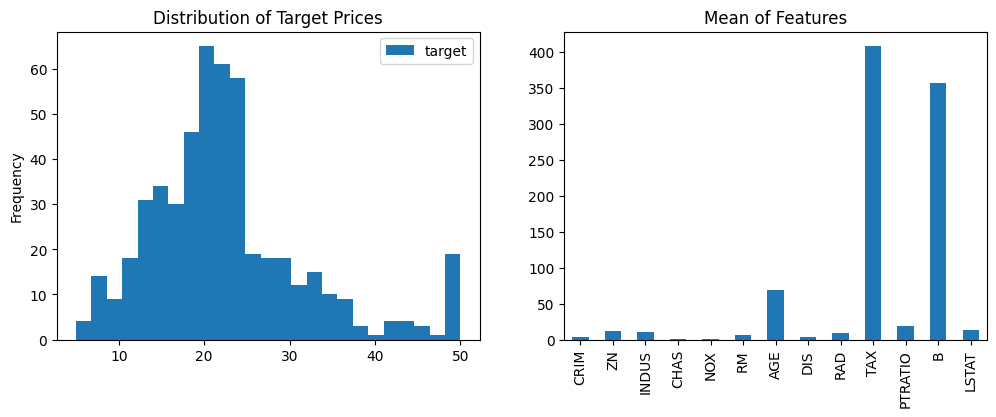

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
df_boston[boston_target_name].plot(kind='hist', title='Distribution of Target Prices', ax=ax[0], bins=25)
df_boston[boston_features_names].mean().plot(kind='bar', title='Mean of Features', ax=ax[1])
fig.show()

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_20072\3264613567.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


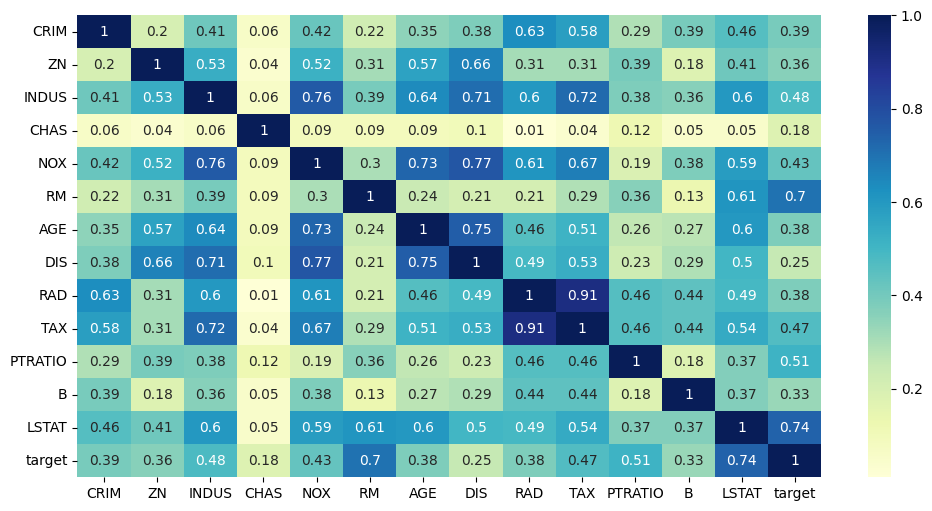

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.heatmap(data=df_boston.corr().abs().round(2), annot=True, cmap="YlGnBu", center=0.5, ax=ax)

fig.show()

In [17]:
from sklearn.model_selection import train_test_split

# Split the data set in train and test
df_train, df_test = train_test_split(df_boston, test_size=0.4)

# Split the data frames in feature df's and target df
x_train = df_train[boston_features_names]
x_test  = df_test[boston_features_names]

y_train = df_train[boston_target_name]
y_test  = df_test[boston_target_name]


In [20]:
# compare the mean of the original and the two newly created df'set
print('average price: ', df_boston['target'].mean(), df_train['target'].mean(), df_test['target'].mean())
print('median price: ', df_boston['target'].median(), df_train['target'].median(), df_test['target'].median())

average price:  22.532806324110677 22.321782178217823 22.84778325123153
median price:  21.2 21.1 21.4


### Baseline Regressor

In [23]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

# The baseline always predict the strategy that we defined, in this case the mean
y_test_baselin[:5]

array([22.32178218, 22.32178218, 22.32178218, 22.32178218, 22.32178218])

### Linear Regressor with multiple Features

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

y_test_pred[:5]

array([[36.65217977],
       [20.23888071],
       [16.24838841],
       [16.36577927],
       [39.93495978]])

### Comparing the Baseline Model to the Linear Regression

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mea_lin = mean_absolute_error(y_test, y_test_pred)
mea_base = mean_absolute_error(y_test, y_test_baselin)
print(f'Mean absolute error Regressor {mea_lin:2f} vs Baseline Regressor {mea_base:2f}')

mse_lin = mean_squared_error(y_test, y_test_pred)
mse_base = mean_squared_error(y_test, y_test_baselin)
print(f'Mean squared error Regressor {mse_lin:2f} vs Baseline Regressor {mse_base:2f}')

r2_lin = r2_score(y_test, y_test_pred)
r2_base = r2_score(y_test, y_test_baselin)
print(f'R2 Score Regressor {r2_lin:2f} vs R2 Score Baseline {r2_base:2f}')


Mean absolute error Regressor 3.235438 vs Baseline Regressor 6.455328
Mean squared error Regressor 21.219551 vs Baseline Regressor 79.224887
R2 Score Regressor 0.731222 vs R2 Score Baseline -0.003505


### Feature Importance before Scaling

In [40]:
df_feature_importance = pd.DataFrame({'Features': x_train.columns, 'Coef': reg.coef_[0], 'ABS (Coef)': np.abs(reg.coef_[0])}
             ).set_index('Features').sort_values('Coef', ascending=False)
df_feature_importance

,Coef,ABS (Coef)
Features,,
CHAS,3.950490,3.950490
RM,3.614149,3.614149
RAD,0.282004,0.282004
ZN,0.043396,0.043396
INDUS,0.026252,0.026252
AGE,0.008999,0.008999
B,0.005792,0.005792
TAX,-0.010436,0.010436
CRIM,-0.104342,0.104342


C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_20072\4179309476.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


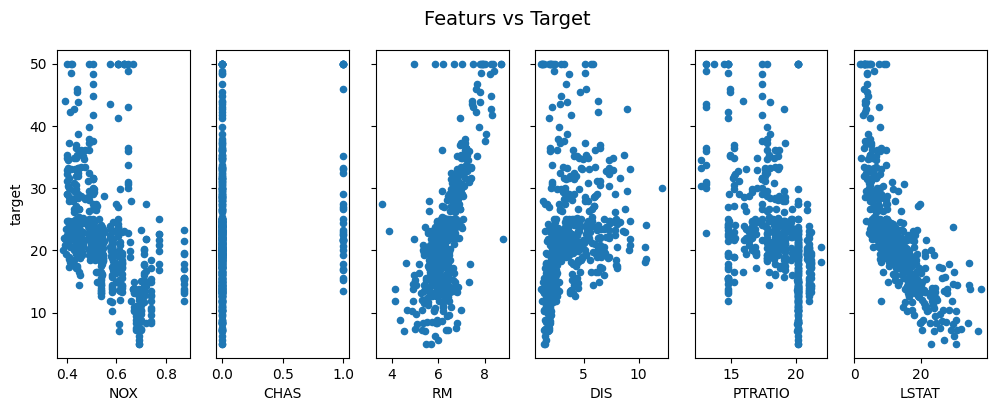

In [45]:
important_featurs = df_feature_importance.sort_values('ABS (Coef)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(12, 4), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_boston.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

### Scale the Data and recalculate the Coef's and Feature Importance

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)
y_test_pred = reg.predict(x_test_scaled)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mea_lin = mean_absolute_error(y_test, y_test_pred)
mea_base = mean_absolute_error(y_test, y_test_baselin)
print(f'Mean absolute error Regressor {mea_lin:2f} vs Baseline Regressor {mea_base:2f}')

mse_lin = mean_squared_error(y_test, y_test_pred)
mse_base = mean_squared_error(y_test, y_test_baselin)
print(f'Mean squared error Regressor {mse_lin:2f} vs Baseline Regressor {mse_base:2f}')

r2_lin = r2_score(y_test, y_test_pred)
r2_base = r2_score(y_test, y_test_baselin)
print(f'R2 Score Regressor {r2_lin:2f} vs R2 Score Baseline {r2_base:2f}')


Mean absolute error Regressor 3.235438 vs Baseline Regressor 6.455328
Mean squared error Regressor 21.219551 vs Baseline Regressor 79.224887
R2 Score Regressor 0.731222 vs R2 Score Baseline -0.003505


In [49]:
df_feature_importance = pd.DataFrame({'Features': x_train.columns, 'Coef': reg.coef_[0], 'ABS (Coef)': np.abs(reg.coef_[0])}
             ).set_index('Features').sort_values('Coef', ascending=False)
df_feature_importance

,Coef,ABS (Coef)
Features,,
RM,18.663463,18.663463
RAD,6.486092,6.486092
ZN,4.122663,4.122663
CHAS,3.950490,3.950490
B,2.284311,2.284311
AGE,0.873799,0.873799
INDUS,0.708802,0.708802
TAX,-5.468426,5.468426
CRIM,-7.672037,7.672037


C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_20072\4179309476.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


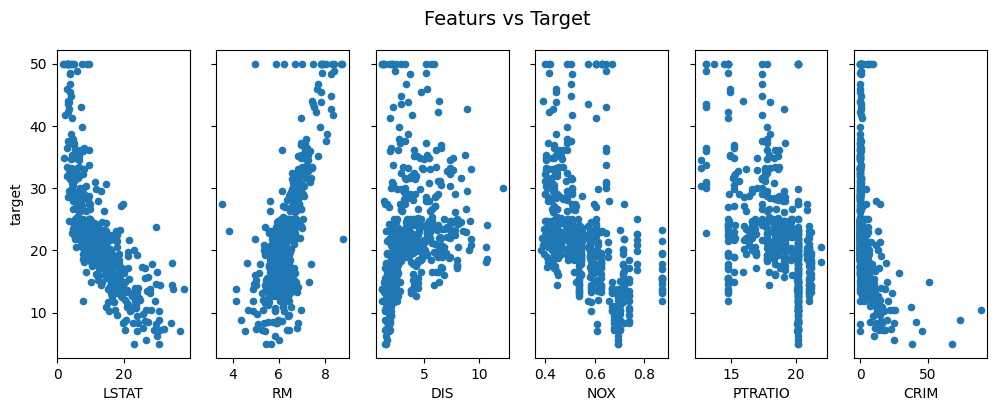

In [50]:
important_featurs = df_feature_importance.sort_values('ABS (Coef)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(12, 4), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_boston.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()